# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [5]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [7]:
print(X[36000])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   4. 149. 255. 184.  12.   0.   0.   0.   0.   0.   0.
   0. 

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [8]:
import matplotlib
import matplotlib.pyplot as plt

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

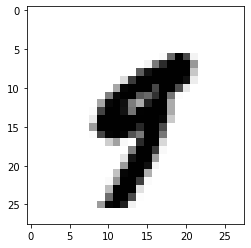

In [9]:
plt.imshow(X[36000].reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [10]:
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [11]:
from sklearn.model_selection import train_test_split 

In [16]:
y5_train = np.where(y_train == '5', 1, 0)
y5_test = np.where(y_test == '5',1, 0)
print(X_train.shape, y5_train.shape, X_test.shape, y5_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y5_train)

C:\Users\x250\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Does the classifier predict correctly the 36000th digit we picked before?

In [23]:
print(logreg.predict(X[36000].reshape(1, -1)))
print("Yes it did. It said it's not a five and it's not.")

[0]
Yes it did. It said it's not a five and it's not.


In [24]:
y_pred = logreg.predict(X_test)

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [25]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [26]:
never_5_clf.fit(X_train, y5_train)
never5_pred = never_5_clf.predict(X_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [28]:
# Logistic Regression
print("Confusion Matrix for the Logistic Regression")
print(confusion_matrix(y5_test, y_pred))
print("Precision", precision_score(y5_test, y_pred))
print("Recall", recall_score(y5_test, y_pred))
print("F-Score", f1_score(y5_test, y_pred))

Confusion Matrix for the Logistic Regression
[[9034   74]
 [ 147  745]]
Precision 0.9096459096459096
Recall 0.8352017937219731
F-Score 0.8708357685563999


In [29]:
# Never 5
print("Confusion Matrix for the Never 5")
print(confusion_matrix(y5_test, never5_pred))
print("Precision", precision_score(y5_test, never5_pred))
print("Recall", recall_score(y5_test, never5_pred))
print("F-Score", f1_score(y5_test, never5_pred))

Confusion Matrix for the Never 5
[[9108    0]
 [ 892    0]]
Precision 0.0
Recall 0.0
F-Score 0.0


C:\Users\x250\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
print("The biggest difference is the confusion matrix. On the second one we see that there are no True Negatives nor False Positives, only True Positives and False Negatives")
print("Without knowing which model is being used I would chose the first one.")
print("From the metrics we can see the F-Score is higher on the first one, therefore more reliable")

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [36]:
from sklearn.metrics import plot_roc_curve

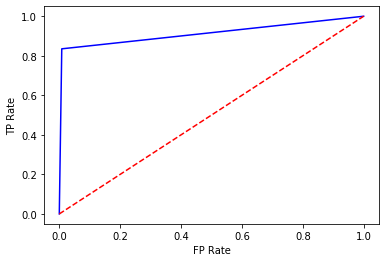

In [37]:
# Logistic Regression
fpr, tpr, threshold = roc_curve(y5_test, y_pred)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

In [40]:

plot_roc_curve(model_5,X_train,y_train_5)

NameError: name 'model_5' is not defined

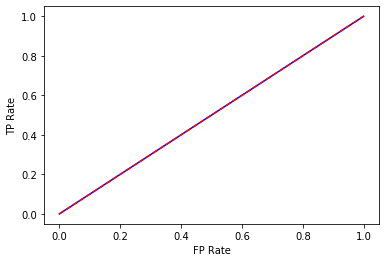

In [32]:
# Never 5
fpr, tpr, threshold = roc_curve(y5_test, never5_pred)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

### Now find the roc_auc_score for each. 

In [33]:
from sklearn.metrics import roc_auc_score

In [34]:
print("AUC Score for Logisitic Regression", roc_auc_score(y5_test, y_pred))

AUC Score for Logisitic Regression 0.9135385341029717


In [35]:
print("AUC Score for Never 5 Classifier", roc_auc_score(y5_test, never5_pred))


AUC Score for Never 5 Classifier 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
print("I would still go with the first one. The second one is only 'guessing'")